## Домашнее задание № 18. Корреляция и корреляционный анализ

- [x] Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

1. Построить точечный график
2. Рассчитать коэффициенты корреляции Пирсона и Спирмена
3. Построить модель линейной регрессии
4. Рассчитать коэффициент детерминации
5. Вывести график остатков

- [x] Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

1. Разделить данные на 2 группы
2. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
# импорт основных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [51]:
# импорт необходимого дата-сета
df = pd.read_csv('DATA/water.csv').drop(columns='Unnamed: 0')
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


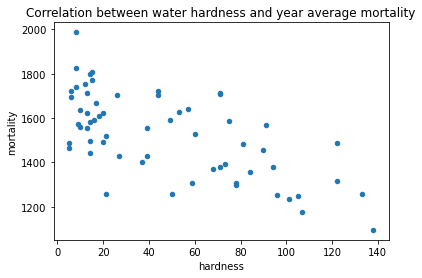

In [15]:
df.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Correlation between water hardness and year average mortality')
plt.show()

<AxesSubplot:>

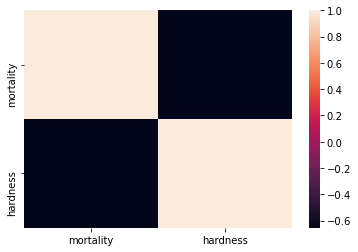

In [16]:
sns.heatmap(df.corr())

In [17]:
# расчитываем коэф. корреляции Пирсона и Спирмена 
c_pirson = df[['hardness','mortality']].corr()
c_spearman = df[['hardness','mortality']].corr(method='spearman')

In [18]:
c_pirson

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [19]:
c_spearman

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [25]:
# Создаем выборки
# Разбиваем выборки на образовательную и тестовую. 70 / 30
x = df[['hardness']]
y = df['mortality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [26]:
# создаем модель и обучаем
model = LinearRegression()
model.fit(x_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [40]:
print(f'k = {model.coef_[0]}') 
print(f'b = {model.intercept_}')
print(f'y = {round(model.coef_[0],2)}x + {round(model.intercept_,2)}')

k = -3.1316708721378266
b = 1668.9722977277095
y = -3.13x + 1668.97


In [32]:
# Расчитываем коэф. детерминации для тестовой части выборки
model.score(x_test, y_test)

0.5046490611017092

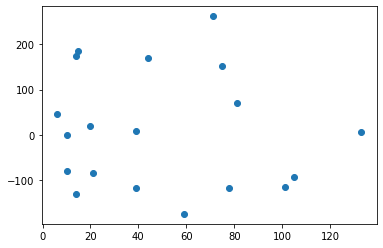

In [62]:
# Вычисляем остатки
y_pred = model.predict(x_test)
residual = (y_test - y_pred)
plt.scatter(x_test, residual)
#plt.hist(residual)

### Выводы: Зависимость между двумя переменными есть, обратная. Модель довольно неплохо предсказывает значение смертности для тестовых значений жесткости воды. Проверим изменяется ли это при разделении выборок на южные и северные города. 

In [67]:
#Объединим все вычисления в функцию
def test_set(x1,y1,df):
    x = df[[x1]]
    y = df[y1]
    ret = dict()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train) 
    print(f'Линия регрессии: y = {round(model.coef_[0],2)}x + {round(model.intercept_,2)}')
    ret['det'] = model.score(x_test, y_test)
    ret['pred'] = model.predict(x_test)
    ret['xtest'] = x_test
    ret['resid'] = (y_test - ret['pred'])
    return ret

In [59]:
# разбиваем исходный датафрейм на два сета
South = df[df['location']=='South'].copy()
North = df[df['location']=='North'].copy()

In [73]:
# Повторяем вычисления для каждого из дата-сетов
South_lr = test_set(x1='hardness', y1='mortality',df=South)
North_lr = test_set(x1='hardness', y1='mortality',df=North)

Линия регрессии: y = -3.51x + 1640.22
Линия регрессии: y = -1.98x + 1688.15


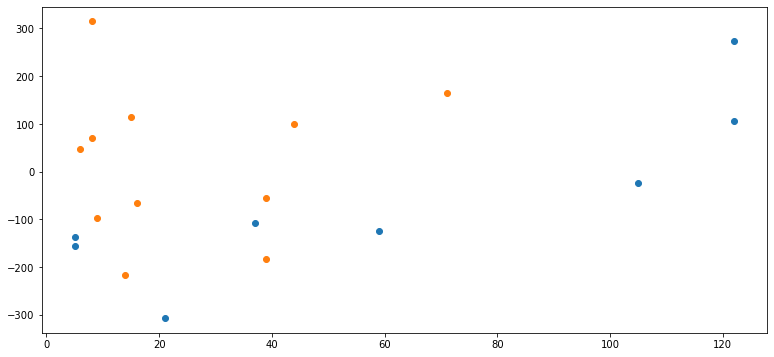

In [75]:
# строим графики остатков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

plt.scatter(South_lr['xtest'], South_lr['resid'])

plt.scatter(North_lr['xtest'], North_lr['resid'])